# Fraud Detection Using Machine Learning
 
**Objective:** Predict fraudulent transactions using multiple ML models and compare their performance.


# All Library's and Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\dvr_s\Downloads\Fraud_Analysis_Dataset.csv')

# Reading Dataset

In [3]:
data.shape

(11142, 10)

In [4]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


# Checking Missing values

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

# Checking Dataset is Balance or Not

In [10]:
data['isFraud'].value_counts(normalize='index')*100

isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64

# Checking Unique Values

In [11]:
data['step'].nunique()

95

In [12]:
data['newbalanceOrig'].nunique()

5914

In [13]:
data['type'].nunique()

5

In [14]:
data['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

# Exploratory Data Analysis

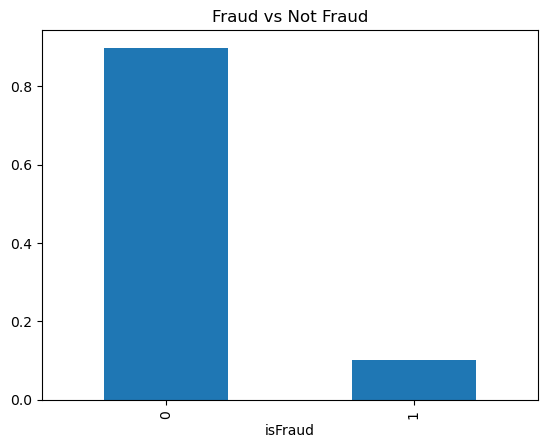

In [15]:
data['isFraud'].value_counts(normalize='Index').plot(kind= 'bar')
plt.title("Fraud vs Not Fraud")
plt.savefig('Fraud_vs_NonFraud.jpg')
plt.show()

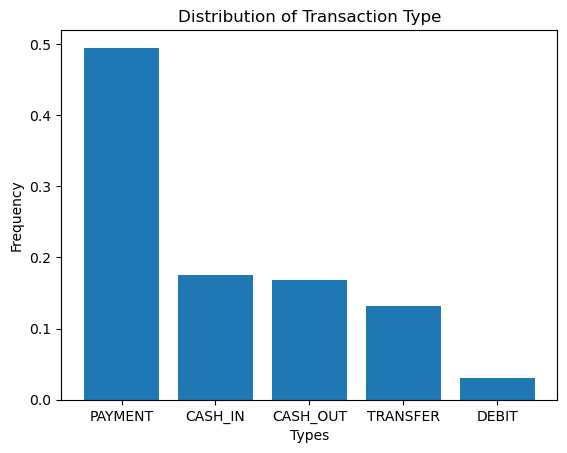

In [16]:
type_counts = data['type'].value_counts(normalize=True)
plt.bar(type_counts.index, type_counts.values)
plt.title('Distribution of Transaction Type')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.savefig('Distribution of Transaction Type.jpg') 
plt.show()

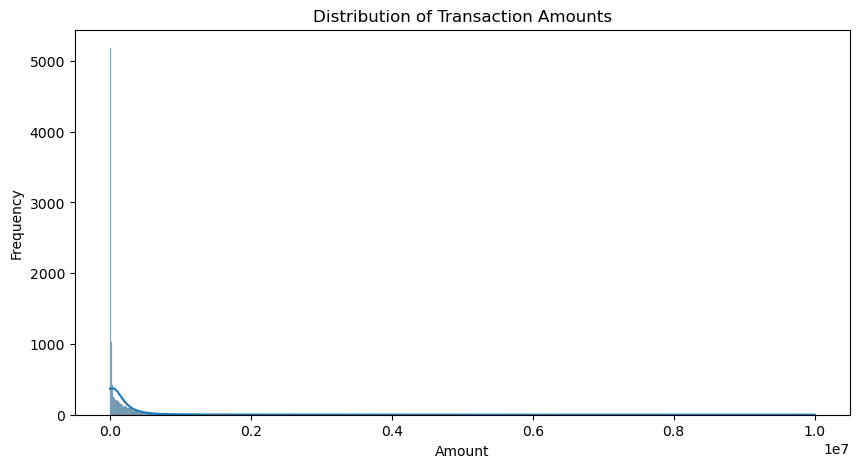

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


# Droping columns

In [18]:
data.drop(columns=['nameOrig','nameDest'],inplace=True)

In [19]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


# Categorical to Numeric

In [20]:
data = pd.get_dummies(data,columns=['type'],dtype=int)

In [21]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0,0,0,0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1,0,1,0,0,0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,0,0,0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,0,1


# Explolatory Data Analysis(Correlation Heatmap)

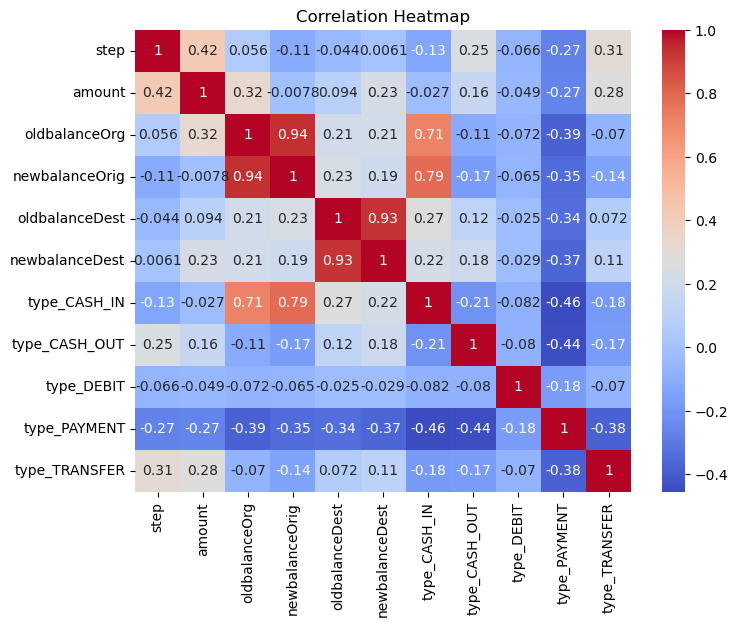

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop('isFraud',axis = 1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('Correlation Heatmap.jpg')
plt.show()

# Spliting Data

In [23]:
data.drop(columns=['oldbalanceOrg','oldbalanceDest'],inplace=True)

In [24]:
X = data.drop('isFraud',axis=1)
y= data['isFraud']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Applying Standard Scaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Evaluation

In [27]:
LR = LogisticRegression(random_state=42,
                       C = 0.1,
                       class_weight='balanced')
LR.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42)

In [28]:
LR_pred = LR.predict(X_test)

In [29]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1999
           1       0.82      0.92      0.86       230

    accuracy                           0.97      2229
   macro avg       0.90      0.95      0.92      2229
weighted avg       0.97      0.97      0.97      2229



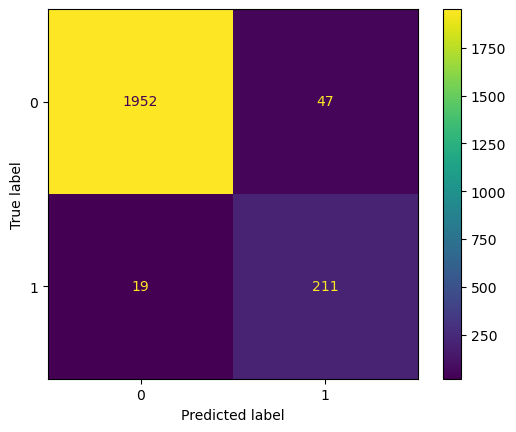

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,LR_pred)).plot()

In [31]:
DT = DecisionTreeClassifier(max_depth=5,
                            random_state=42,
                           class_weight='balanced',
                           ccp_alpha=0.01)
DT.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       random_state=42)

In [32]:
DT_pred = DT.predict(X_test)

In [33]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1999
           1       0.95      0.94      0.95       230

    accuracy                           0.99      2229
   macro avg       0.97      0.97      0.97      2229
weighted avg       0.99      0.99      0.99      2229



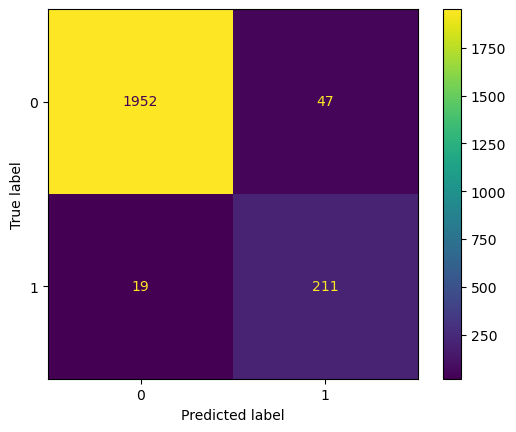

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test,LR_pred)).plot()

In [35]:
RF = RandomForestClassifier(n_estimators=100,
                           max_depth=5,
                           random_state=42,
                           class_weight='balanced',
                           ccp_alpha=0.01,
                           n_jobs=-1,
                           )
RF.fit(X_train,y_train)


RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       n_jobs=-1, random_state=42)

In [36]:
RF_pred = RF.predict(X_test)

In [37]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       0.99      0.92      0.95       230

    accuracy                           0.99      2229
   macro avg       0.99      0.96      0.97      2229
weighted avg       0.99      0.99      0.99      2229



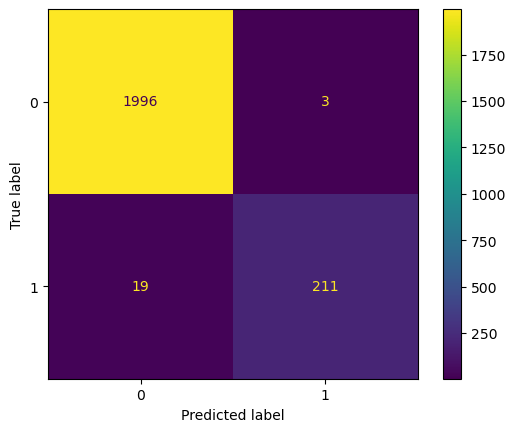

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test,RF_pred)).plot()

In [39]:
X = data.drop('isFraud',axis=1)
y= data['isFraud']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
XG = XGBClassifier(random_state=42,
                  n_jobs=-1,
                  max_depth=3,
                  C=0.1
                  )
XG.fit(X_train,y_train)

XGBClassifier(C=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [42]:
XG_pred = XG.predict(X_test)


In [43]:
print(classification_report(y_test,XG_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       0.98      0.94      0.96       230

    accuracy                           0.99      2229
   macro avg       0.99      0.97      0.98      2229
weighted avg       0.99      0.99      0.99      2229



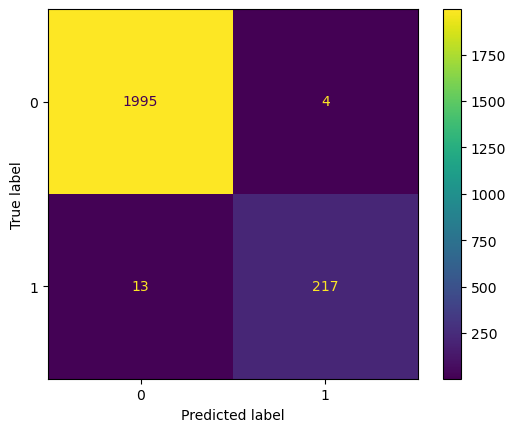

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,XG_pred)).plot()

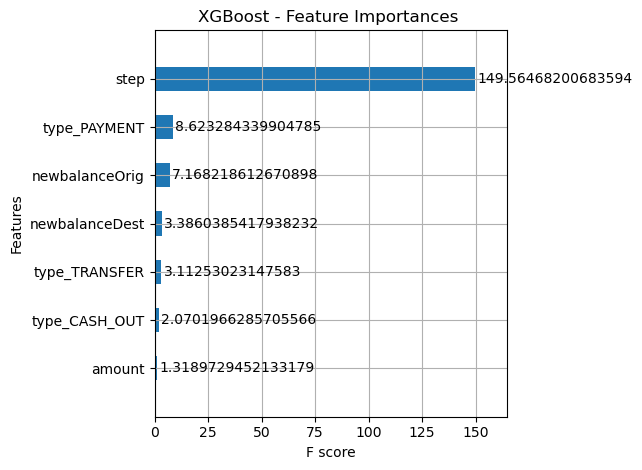

In [45]:
booster = XG.get_booster()
booster.feature_names = X_train.columns.tolist() 

xgb.plot_importance(booster, max_num_features=20, importance_type='gain', height=0.5)
plt.title("XGBoost - Feature Importances ")
plt.tight_layout()
plt.show()

# All Metrics Result's

In [46]:
print('*'*70)
print('Logistic Regression')
print(classification_report(y_test,LR_pred))
print('*'*70)
print('Desicion Tree')
print(classification_report(y_test,DT_pred))
print('*'*70)
print('Random Forest')
print(classification_report(y_test,RF_pred))
print('*'*70)
print('XG Boost')
print(classification_report(y_test,XG_pred))
print('*'*70)

**********************************************************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1999
           1       0.82      0.92      0.86       230

    accuracy                           0.97      2229
   macro avg       0.90      0.95      0.92      2229
weighted avg       0.97      0.97      0.97      2229

**********************************************************************
Desicion Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1999
           1       0.95      0.94      0.95       230

    accuracy                           0.99      2229
   macro avg       0.97      0.97      0.97      2229
weighted avg       0.99      0.99      0.99      2229

**********************************************************************
Random Forest
              precision    recall  f1-score   support

           0       0.99      1

# Conclusion
Among all the models tested, **XGBoost** provided the highest precision and F1-score, making it the most reliable for detecting fraud.
